<a href="https://colab.research.google.com/github/tal-rsg/analys_trade/blob/main/analys_btc_trade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install ta
!pip install pandas_ta
!pip install bta-lib
!pip install finta
!pip install talib-binary

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=bcd401f7b4deeb283b38d1d616ce3af891c53e7323c1e7914e3114e1cc7edcfc
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=f71d8df0f1c47d7e8bde7f63ace270719e92367d4ecedefd5fb53b700d958228
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 2.3 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement talib-binary (from versions: none)
ERROR: No matching distribution found for talib-binary


In [1]:
import pandas as pd
import yfinance as yf
from ta import add_all_ta_features
import pandas_ta
import btalib
#import talib
#from finta import TA

In [2]:
data = yf.download('BTC-USD', start = '2020-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
df = pd.DataFrame(data)

df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2020-01-01,7200.174316,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02,6985.470215,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03,7344.884277,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04,7410.656738,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05,7411.317383,7411.317383,7544.497070,7400.535645,7410.451660,19725074095


In [4]:
data.dtypes

Price      Ticker 
Adj Close  BTC-USD    float64
Close      BTC-USD    float64
High       BTC-USD    float64
Low        BTC-USD    float64
Open       BTC-USD    float64
Volume     BTC-USD      int64
dtype: object

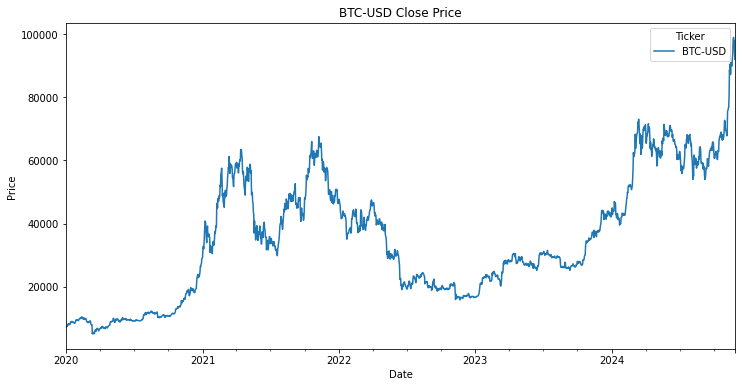

In [5]:
# prompt: using df to create a line chart using atribute Close

import matplotlib.pyplot as plt

# Assuming 'Close' is the column you want to plot
df['Close'].plot(figsize=(12, 6))
plt.title('BTC-USD Close Price')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

In [6]:
df_last = df.tail(1)

df_last

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2024-11-27,94651.96875,94651.96875,94911.546875,91804.367188,91938.320312,74442317824


In [7]:
# prompt: Usando o dataframe df_last calcular o percentual da diferença dos atributos open e close

percentual_diff = ((df_last['Close'] - df_last['Open']) / df_last['Open']) * 100
percentual_diff

Ticker,BTC-USD
Date,
2024-11-27,2.951597


In [42]:
df_btc_filter = df[(df.index >= '2024-11-13') & (df.index <= '2024-11-22')]

df_btc_filter.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2024-11-13,90584.164062,90584.164062,93434.351562,86256.929688,87929.968750,123559027869
2024-11-14,87250.429688,87250.429688,91765.218750,86682.812500,90574.882812,87616705248
2024-11-15,91066.007812,91066.007812,91868.742188,87124.898438,87284.179688,78243109518
2024-11-16,90558.476562,90558.476562,91763.945312,90094.226562,91064.367188,44333192814
2024-11-17,89845.851562,89845.851562,91433.039062,88741.664062,90558.460938,46350159305


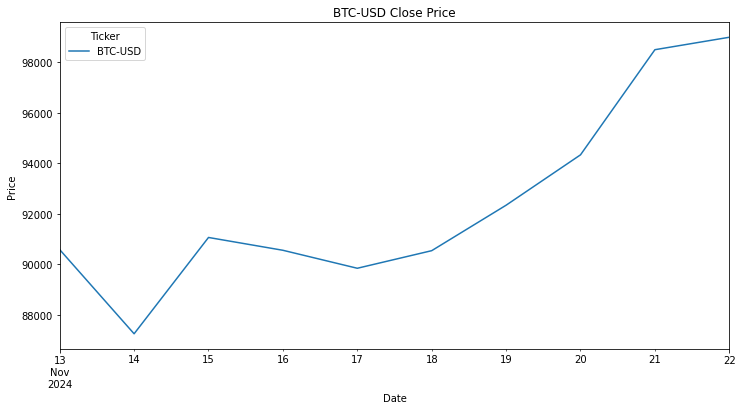

In [47]:
# Assuming 'Close' is the column you want to plot
df_btc_filter['Close'].plot(figsize=(12, 6))
plt.title('BTC-USD Close Price')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

In [48]:
df_btc_filter.dtypes

Price      Ticker 
Adj Close  BTC-USD    float64
Close      BTC-USD    float64
High       BTC-USD    float64
Low        BTC-USD    float64
Open       BTC-USD    float64
Volume     BTC-USD      int64
dtype: object

In [49]:
def calcular_diferenca_percentual(df):
  """Calcula a diferença percentual entre as colunas 'open' e 'close' de um DataFrame.

  Args:
    df: Um DataFrame Pandas.

  Returns:
    Um novo DataFrame com a coluna 'Resultado' adicionada.
  """

  # Assumindo que as colunas corretas são 'float64Open' e 'float64Close'
  df['Resultado'] = ((df['Close'] - df['Open']) / df['Open']) * 100
  return df

# Aplicando a função ao DataFrame
df2 = calcular_diferenca_percentual(df_btc_filter.copy())

df2.head()

Price,Adj Close,Close,High,Low,Open,Volume,Resultado
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,
Date,,,,,,,
2024-11-13,90584.164062,90584.164062,93434.351562,86256.929688,87929.968750,123559027869,3.018533
2024-11-14,87250.429688,87250.429688,91765.218750,86682.812500,90574.882812,87616705248,-3.670392
2024-11-15,91066.007812,91066.007812,91868.742188,87124.898438,87284.179688,78243109518,4.332776
2024-11-16,90558.476562,90558.476562,91763.945312,90094.226562,91064.367188,44333192814,-0.555531
2024-11-17,89845.851562,89845.851562,91433.039062,88741.664062,90558.460938,46350159305,-0.786905


In [50]:
import numpy as np
df2['Resultado'] = np.where(df2['Open'] != 0, ((df2['Close'] - df2['Open']) / df2['Open']) * 100, np.nan)
df2.head()

Price,Adj Close,Close,High,Low,Open,Volume,Resultado
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,
Date,,,,,,,
2024-11-13,90584.164062,90584.164062,93434.351562,86256.929688,87929.968750,123559027869,3.018533
2024-11-14,87250.429688,87250.429688,91765.218750,86682.812500,90574.882812,87616705248,-3.670392
2024-11-15,91066.007812,91066.007812,91868.742188,87124.898438,87284.179688,78243109518,4.332776
2024-11-16,90558.476562,90558.476562,91763.945312,90094.226562,91064.367188,44333192814,-0.555531
2024-11-17,89845.851562,89845.851562,91433.039062,88741.664062,90558.460938,46350159305,-0.786905


In [51]:
# calculando resultado
total_resultado = df2['Resultado'].sum()
vr_atual = 1000 * (1 + total_resultado / 100)
print("O total da coluna Resultado é:", total_resultado)
print("O valor atual:", vr_atual)

O total da coluna Resultado é: 12.204936663376609
O valor atual: 1122.049366633766


In [52]:
df_acao_ita = yf.download('ITUB4.SA', start = '2020-01-01')

[*********************100%***********************]  1 of 1 completed


In [53]:
df_acao_ita.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ITUB4.SA,ITUB4.SA,ITUB4.SA,ITUB4.SA,ITUB4.SA,ITUB4.SA
Date,,,,,,
2020-01-02,30.934130,38.029999,38.029999,36.990002,37.279999,20666100
2020-01-03,30.608761,37.630001,38.240002,37.450001,37.500000,24891400
2020-01-06,30.153248,37.070000,37.580002,36.910000,37.549999,22294700
2020-01-07,29.453720,36.209999,37.240002,36.209999,37.070000,20000900
2020-01-08,28.973803,35.619999,36.810001,35.619999,36.450001,25980900


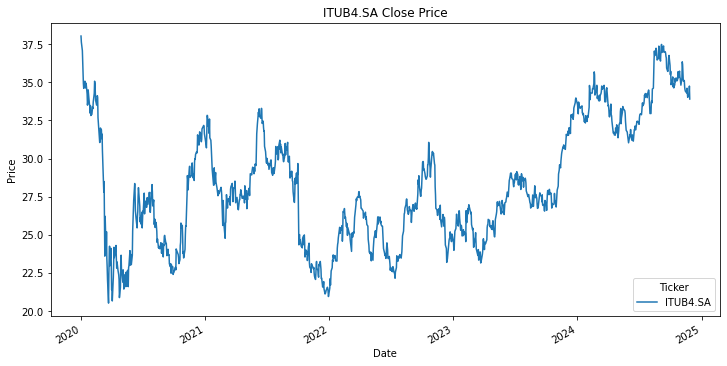

In [54]:
# Assuming 'Close' is the column you want to plot
df_acao_ita['Close'].plot(figsize=(12, 6))
plt.title('ITUB4.SA Close Price')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()